In [1]:
%matplotlib inline
from results.setmap import SetMap

['charging', 'station', 'tesla']


Indexing...
Ready


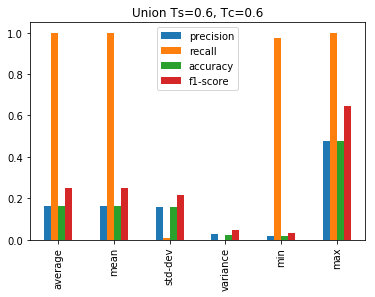

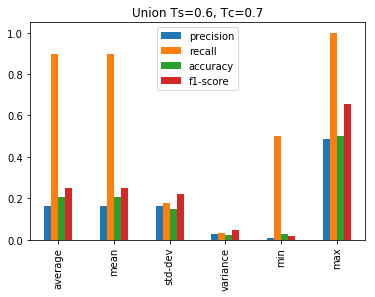

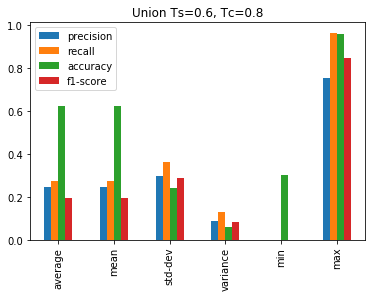

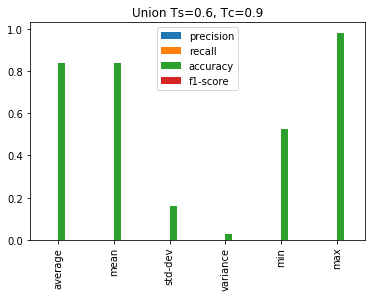

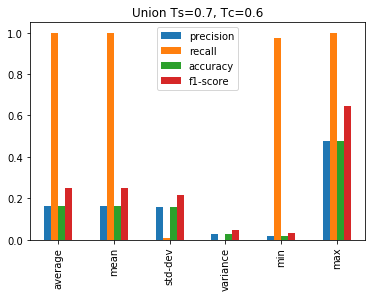

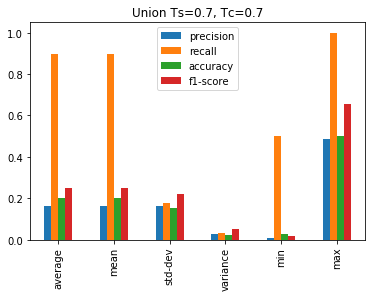

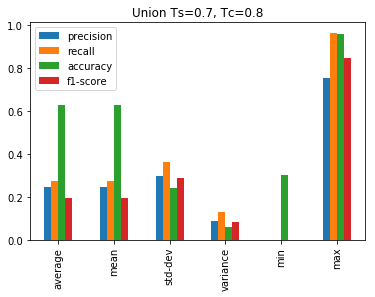

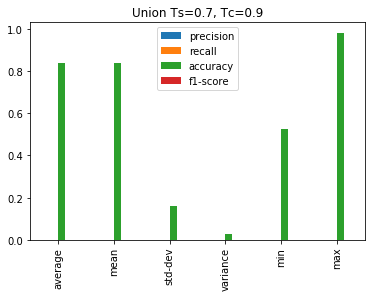

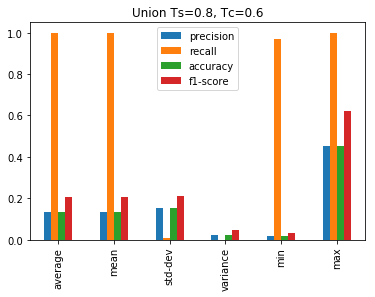

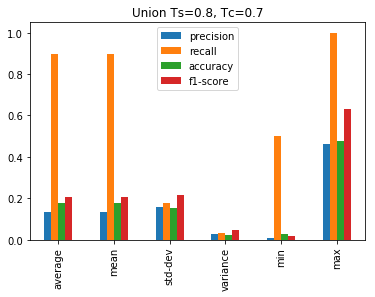

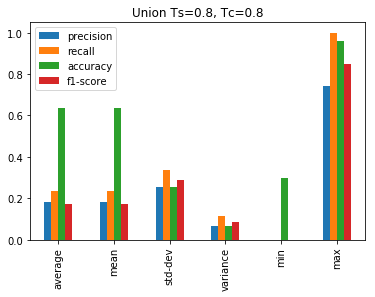

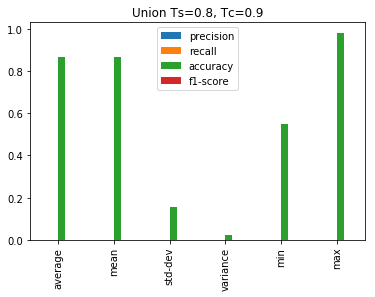

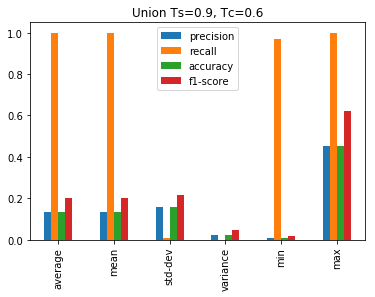

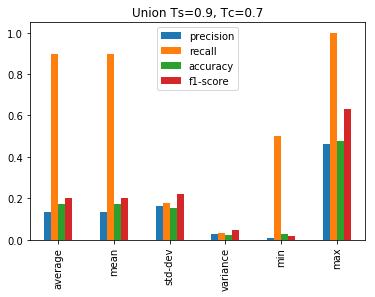

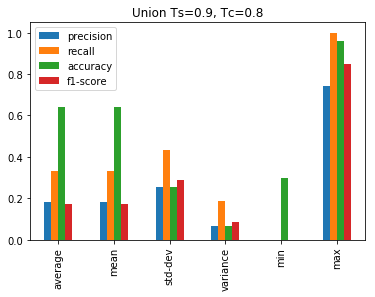

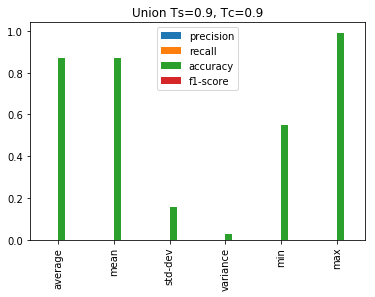

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from rdflib import Namespace
plt.rcParams.update({'figure.max_open_warning': 0})
OTD = Namespace('http://www.quaat.com/ontologies#')
set_map = SetMap()

def search_analysis(sm, query, concept, threshold, output='plot'):
    Rmanual = sm.gen_analysis(query, concept, threshold, "tagged")
    Rauto = sm.gen_analysis(query, concept, threshold, "auto")
    Runion = sm.gen_analysis(query, concept, threshold, "auto", "tagged")
    return [Rmanual, Rauto, Runion]

def statistics(_v, label):
    total = [n[2] for n in _v]
    prec = [v[0] for v in total]
    reca = [v[1] for v in total]
    acc = [v[2] for v in total]
    f1 = [v[3] for v in total]

    df = pd.DataFrame([[np.average(prec), np.average(reca), np.average(acc), np.average(f1)],
                    [np.mean(prec), np.mean(reca), np.mean(acc), np.mean(f1)],
                    [np.std(prec), np.std(reca), np.std(acc), np.std(f1)],
                    [np.var(prec), np.var(reca), np.var(acc), np.var(f1)],
                    [np.amin(prec), np.amin(reca), np.amin(acc), np.amin(f1)],
                    [np.amax(prec), np.amax(reca), np.amax(acc), np.amax(f1)]],
                    columns=['precision', 'recall', 'accuracy', 'f1-score'],
                   index=['average', 'mean', 'std-dev', 'variance', 'min', 'max'])
    df = pd.DataFrame([[np.average(prec), np.average(reca), np.average(acc), np.average(f1)],
                    [np.mean(prec), np.mean(reca), np.mean(acc), np.mean(f1)],
                    [np.std(prec), np.std(reca), np.std(acc), np.std(f1)],
                    [np.var(prec), np.var(reca), np.var(acc), np.var(f1)],
                    [np.amin(prec), np.amin(reca), np.amin(acc), np.amin(f1)],
                    [np.amax(prec), np.amax(reca), np.amax(acc), np.amax(f1)]],
                    columns=['precision', 'recall', 'accuracy', 'f1-score'],
                   index=['average', 'mean', 'std-dev', 'variance', 'min', 'max'])
    title = '{} {}'.format('Union', label)
    df.plot(kind='bar', title=title)
    
for search_thresh in [0.6, 0.7, 0.8, 0.9]:
    set_map.build_map(search_thresh)
    for concept_thresh in [0.6, 0.7, 0.8, 0.9]:
        v = [
            search_analysis(set_map, "electric car charging station", OTD.ChargingStation, concept_thresh),
            search_analysis(set_map, "information on air quality", OTD.EnvironmentInformation, concept_thresh),
            search_analysis(set_map, "location", OTD.Location, concept_thresh),
            search_analysis(set_map, "statistics", OTD.Statistics, concept_thresh),
            search_analysis(set_map, "trail", OTD.Trail, concept_thresh),
            search_analysis(set_map, "bike", OTD.Bicycle, concept_thresh),
            search_analysis(set_map, "map", OTD.Map, concept_thresh)
            ]
        statistics(v, 'Ts={}, Tc={}'.format(str(search_thresh), str(concept_thresh)))



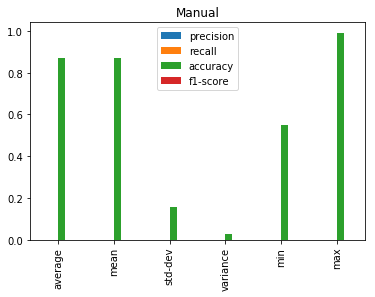

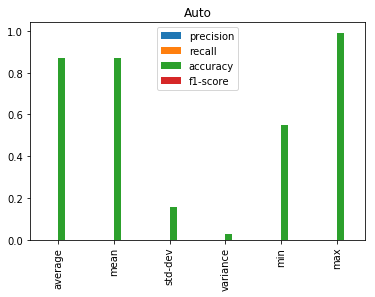

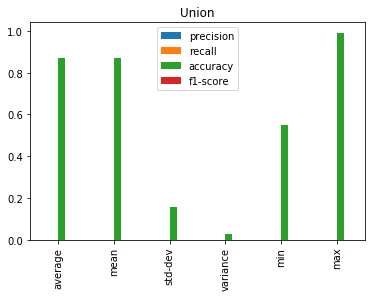

In [3]:
import numpy as np
for i,t in enumerate(['Manual','Auto','Union']):
    total = [n[i] for n in v]

    prec = [v[0] for v in total]
    reca = [v[1] for v in total]
    acc = [v[2] for v in total]
    f1 = [v[3] for v in total]

    df = pd.DataFrame([[np.average(prec), np.average(reca), np.average(acc), np.average(f1)],
                    [np.mean(prec), np.mean(reca), np.mean(acc), np.mean(f1)],
                    [np.std(prec), np.std(reca), np.std(acc), np.std(f1)],
                    [np.var(prec), np.var(reca), np.var(acc), np.var(f1)],
                    [np.amin(prec), np.amin(reca), np.amin(acc), np.amin(f1)],
                    [np.amax(prec), np.amax(reca), np.amax(acc), np.amax(f1)]],
                    columns=['precision', 'recall', 'accuracy', 'f1-score'],
                   index=['average', 'mean', 'std-dev', 'variance', 'min', 'max'])
    df.plot(kind='bar', title=t)

In [4]:
def closure(val):
    value = val
    def get_next():
        nonlocal value
        value += 1
        return value
    
    return get_next

[[0.0, 0.0, 0.5, 0.0], [0.043478260869565216, 0.25, 0.4772234273318872, 0.07407407407407408], [1.0, 0.11764705882352941, 0.5045871559633027, 0.21052631578947367], [0.0, 0.0, 0.4966139954853273, 0.0], [1.0, 0.01818181818181818, 0.5011389521640092, 0.03571428571428572], [0.8571428571428571, 1.0, 0.5057471264367817, 0.923076923076923], [0.0, 0.0, 0.4230769230769231, 0.0]]


,precision,recall,accuracy,f1-score
q1,0.000000,0.000000,0.500000,0.000000
q2,0.043478,0.250000,0.477223,0.074074
q3,1.000000,0.117647,0.504587,0.210526
q4,0.000000,0.000000,0.496614,0.000000
q5,1.000000,0.018182,0.501139,0.035714
q6,0.857143,1.000000,0.505747,0.923077
q7,0.000000,0.000000,0.423077,0.000000


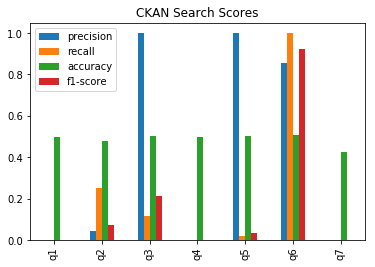

In [5]:
# Table showing results from search querying the CKAN server with the same seach word (norwegian)
# as the semantic search engine

# ndoc, relevant, irrelevant, relevant not found, total relevant
#        tp   fp  fn
a = [ 0,  0,  0,  1,  1]
b = [ 23, 1, 22,  3,  4]
c = [ 4,  4,  0, 30, 34]
d = [ 3,  0,  3,  5,  5]
e = [ 1,  1,  0, 54, 55]
f = [ 7,  6,  1,  0,  6]
g = [80,  0, 80,  3,  3]

totalv = [a,b,c,d,e,f,g]
def precision (v):
    tp = v[1]
    fp = v[2]
    fn = v[3]
    if (tp+fp) > 0:
        return tp / (tp+fp)
    return 0.0

def recall (v):
    tp = v[1]
    fp = v[2]
    fn = v[3]
    if (tp+fn) > 0:
        return tp/(tp+fn)
    return 0.0

def accuracy(v):
    tp = v[1]
    fp = v[2]
    fn = v[3]
    tn = 220-tp
    if (tp+tn+fp+fn) > 0:
        return (tp+tn)/(tp+tn+fp+tn)
    
def f1_score (v):
    p = precision(v)
    r = recall(v)
    if (p+r) > 0:
        return 2.0*(p*r)/(p+r)
    return 0.0
    
tot = []
for v in totalv:
    tot.append([precision(v), recall(v), accuracy(v), f1_score(v)])
print (tot)

df = pd.DataFrame(tot, columns=['precision', 'recall', 'accuracy', 'f1-score'],
                   index=['q1','q2', 'q3', 'q4', 'q5', 'q6', 'q7'])
df.plot(kind='bar', title='CKAN Search Scores')
df

,precision,recall,accuracy,f1-score
average,0.414374,0.0,0.867857,0.0
mean,0.414374,0.0,0.867857,0.0
std-dev,0.468225,0.0,0.157827,0.0
variance,0.219234,0.0,0.024909,0.0
min,0.000000,0.0,0.550000,0.0
max,1.000000,0.0,0.991667,0.0


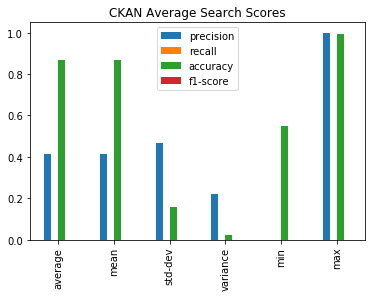

In [6]:

prec = [v[0] for v in tot]
reca = [v[1] for v in total]
acc  = [v[2] for v in total]
f1   = [v[3] for v in total]

df = pd.DataFrame([[np.average(prec), np.average(reca), np.average(acc), np.average(f1)],
                    [np.mean(prec), np.mean(reca), np.mean(acc), np.mean(f1)],
                    [np.std(prec), np.std(reca), np.std(acc), np.std(f1)],
                    [np.var(prec), np.var(reca), np.var(acc), np.var(f1)],
                    [np.amin(prec), np.amin(reca), np.amin(acc), np.amin(f1)],
                    [np.amax(prec), np.amax(reca), np.amax(acc), np.amax(f1)]],
                    columns=['precision', 'recall', 'accuracy', 'f1-score'],
                   index=['average', 'mean', 'std-dev', 'variance', 'min', 'max'])
df.plot(kind='bar', title='CKAN Average Search Scores')
df